In [24]:
import pandas as pd


# In[83]:
df = pd.read_csv('Data_Train.csv')
df.head(10)
print(df.shape)


(78458, 11)


In [25]:

#Replace K, M, B
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    if ',' in x:
        return float(x.replace(',', '')) 
    return float(x)

df.Likes = df.Likes.apply(value_to_float)
df.Popularity = df.Popularity.apply(value_to_float)
df.to_csv('Data_Train_Transformed_1.csv')
df = df[df['Views'] > df["Likes"]]
# print(df.shape)
# print(df.head())

In [26]:
df_mean = df.groupby('Name').mean()
df_mean.to_csv('Test_2.csv')

In [3]:
#Labels
import numpy as np
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6500,7000,7500,8000,8500,9000,9500,10000,12500,20000,22500,25000,50000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1200000,1400000,
        1600000,2000000,3000000,4000000,5000000,6000000,7000000,10000000,13000000,15000000,18000000,25000000,np.inf]
names = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,
         38,39,40,41,42,43,44,45,46,47,48,49]

df['Name_Label'] = pd.cut(df['Views'], bins, labels=names)

In [4]:
#Labels
df['Genre_Label'] = df['Genre'].map({'drumbass':1, 'deephouse':2,'metal':3, 'rock':4, 'electronic':5,
                                     'latin':6, 'dubstep':7, 'danceedm':8, 'trap':9, 'country':10,
                                     'pop':11, 'disco':12, 'classical':13, 'ambient':14, 'folksingersongwriter':15,
                                     'rbsoul':16, 'alternativerock':17, 'reggaeton':18, 'indie':19, 'hiphoprap':20,'all-music':21})

In [5]:
#Get counts by Name_label bins
df['Name_Label'].value_counts()
df['Genre_Label'].value_counts()

8     22574
5     17490
21    10261
16     5407
6      4558
9      4005
4      3885
2      2423
11     1776
7      1093
14      792
13      767
1       671
3       508
10      336
12      263
17      156
20      100
18       55
15       39
19       11
Name: Genre_Label, dtype: int64

In [6]:
df['Name_Label'] = df['Name_Label'].astype('int64')
# df.isnull().sum()
# df.describe()
df.dtypes
# # print(df.head()

Unique_ID        int64
Name            object
Genre           object
Country         object
Song_Name       object
Timestamp       object
Views            int64
Comments         int64
Likes          float64
Popularity     float64
Followers        int64
Name_Label       int64
Genre_Label      int64
dtype: object

In [7]:
# Distribution of features by Genre
df_mean = df.groupby('Genre').mean()
print(df_mean)

                         Unique_ID         Views    Comments         Likes  \
Genre                                                                        
all-music             7.996840e+05  2.454978e+06  294.812007  36307.722834   
alternativerock       7.715628e+05  8.545917e+05  190.173077  11453.076923   
ambient               1.101245e+06  4.262042e+05   94.012626   6845.500000   
classical             9.667382e+05  3.931904e+05   91.676662   7339.490222   
country               5.000266e+05  2.945058e+05  124.800595   5161.773810   
danceedm              7.100286e+05  2.673978e+05  115.092053   4892.249845   
deephouse             1.160870e+06  6.264949e+04   66.227404   1641.210070   
disco                 3.550677e+05  5.235317e+05  122.627376   8923.003802   
drumbass              5.862023e+05  3.712738e+04   67.277198   1334.828614   
dubstep               6.606288e+05  2.422849e+05  168.148216   5888.222324   
electronic            7.150612e+05  1.820002e+05  103.775014   3

In [8]:
# #Histogram Plotting each variable
# #Plotting Likes or comments or popularity
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.hist(df['Likes'])
# plt.ylabel('No of times')
# plt.show()

# #Plotting Comments
# plt.hist(df['Comments'])
# plt.ylabel('No of times')
# plt.show()

# #Plotting Popularity
# plt.hist(df['Popularity'])
# plt.ylabel('No of times')
# plt.show()

# #Plotting Views
# plt.hist(df['Views'])
# plt.ylabel('No of times')
# plt.show()

In [9]:
# # Scatter Plot
# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df['Unique_ID'], df['Popularity'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Popularity')

# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df['Unique_ID'], df['Views'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Views')

# fig, ax = plt.subplots(figsize=(16,8))
# ax.scatter(df['Unique_ID'], df['Likes'])
# ax.set_xlabel('Unique Id')
# ax.set_ylabel('Likes')

In [10]:
#Correlation matrix
print(df.head())
df.drop(['Unique_ID','Name','Genre','Country','Timestamp','Song_Name','Comments','Followers'],inplace = True, axis = 1)
df.head()


   Unique_ID              Name     Genre Country  \
0     413890         Hardstyle  danceedm      AU   
1     249453        Dj Aladdin  danceedm      AU   
2     681116  Maxximize On Air  danceedm      AU   
3     387253       GR6 EXPLODE    rbsoul      AU   
4    1428029          Tritonal  danceedm      AU   

                                           Song_Name  \
0  N-Vitral presents BOMBSQUAD - Poison Spitter (...   
1          Dj Aladdin - Old School Hip Hop Quick Mix   
2  Maxximize On Air - Mixed by Blasterjaxx - Epis...   
3                MC Yago - Tenho Compromisso (DJ R7)   
4                         Escape (feat. Steph Jones)   

                    Timestamp   Views  Comments   Likes  Popularity  \
0  2018-03-30 15:24:45.000000   14017         4   499.0        97.0   
1  2016-06-20 05:58:52.000000    1918        17    49.0        17.0   
2  2015-05-08 17:45:59.000000    9668        11   312.0        91.0   
3  2017-06-08 23:50:03.000000  113036         2  2400.0        76.

,Views,Likes,Popularity,Name_Label,Genre_Label
0,14017,499.0,97.0,21,8
1,1918,49.0,17.0,4,8
2,9668,312.0,91.0,19,8
3,113036,2400.0,76.0,26,16
4,110024,3031.0,699.0,26,8


In [11]:
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# # Converting Genre and Name to labelencoding
# labelencoder = LabelEncoder()
# df['Genre'] = labelencoder.fit_transform(df['Genre'])
# # df['Name_Label'] = labelencoder.fit_transform(df['Name_Label'])
# df.head()


In [12]:
df.to_csv('Test_1.csv')

In [13]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
sc_x = StandardScaler()
ct = ColumnTransformer([
         ('somename', StandardScaler(), ['Likes','Popularity','Name_Label','Genre_Label'])
       ], remainder='passthrough')
df = ct.fit_transform(df)
df = pd.DataFrame(df,columns=['Likes','Popularity','Name_Label','Genre_Label','Views'])
print(df.head())

      Likes  Popularity  Name_Label  Genre_Label     Views
0 -0.159204   -0.173071    0.059371    -0.230493   14017.0
1 -0.167662   -0.189570   -1.588835    -0.230493    1918.0
2 -0.162719   -0.174308   -0.134536    -0.230493    9668.0
3 -0.123471   -0.177402    0.544137     1.194659  113036.0
4 -0.111610   -0.048918    0.544137    -0.230493  110024.0


D:\Applns\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Applns\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
#Removing outliers using IQR
Q1 = df.quantile(0.25,numeric_only=True)
Q3 = df.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1
#df = df[~((df["Likes"] < (Q1 - 1.5 * IQR)) |(df["Likes"] > (Q3 + 1.5 * IQR)))]
df= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)
df.head()

(57341, 5)


,Likes,Popularity,Name_Label,Genre_Label,Views
0,-0.159204,-0.173071,0.059371,-0.230493,14017.0
1,-0.167662,-0.189570,-1.588835,-0.230493,1918.0
2,-0.162719,-0.174308,-0.134536,-0.230493,9668.0
3,-0.123471,-0.177402,0.544137,1.194659,113036.0
4,-0.111610,-0.048918,0.544137,-0.230493,110024.0


In [15]:
df.isnull().sum()


Likes          0
Popularity     0
Name_Label     0
Genre_Label    0
Views          0
dtype: int64

In [16]:
y = df['Views']
df.drop('Views', inplace=True,axis=1)
y.plot.hist()

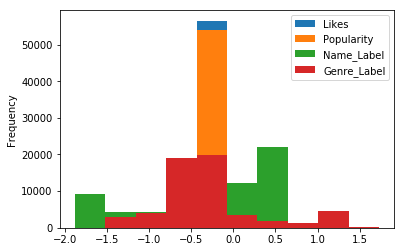

In [17]:
df.describe()
df.plot.hist()

In [18]:
from sklearn.model_selection import train_test_split
#print(df_scaled)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=205)

In [19]:
#XGB Boost regression
import xgboost as xgb
from sklearn import metrics
xlf = xgb.XGBRegressor()
xlf.fit(X_train, y_train, eval_metric='rmse', verbose = True, eval_set = [(X_test, y_test)])
# calculate the auc score
y_pred = xlf.predict(X_test)
#RMSE - Test
print("RMSE - XGBoost regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


[19:15:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:58022.4
[1]	validation_0-rmse:52450.3
[2]	validation_0-rmse:47458.1
[3]	validation_0-rmse:42982.9
[4]	validation_0-rmse:38982.3
[5]	validation_0-rmse:35403


D:\Applns\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[6]	validation_0-rmse:32211.9
[7]	validation_0-rmse:29364.5
[8]	validation_0-rmse:26838.2
[9]	validation_0-rmse:24599.5
[10]	validation_0-rmse:22619
[11]	validation_0-rmse:20879.6
[12]	validation_0-rmse:19348.5
[13]	validation_0-rmse:18015.4
[14]	validation_0-rmse:16849.5
[15]	validation_0-rmse:15842.2
[16]	validation_0-rmse:14962.9
[17]	validation_0-rmse:14213.9
[18]	validation_0-rmse:13576.3
[19]	validation_0-rmse:13028.6
[20]	validation_0-rmse:12570.6
[21]	validation_0-rmse:12172.9
[22]	validation_0-rmse:11847
[23]	validation_0-rmse:11570.3
[24]	validation_0-rmse:11334.9
[25]	validation_0-rmse:11134.3
[26]	validation_0-rmse:10971.5
[27]	validation_0-rmse:10836.6
[28]	validation_0-rmse:10722.4
[29]	validation_0-rmse:10625.3
[30]	validation_0-rmse:10541
[31]	validation_0-rmse:10473.4
[32]	validation_0-rmse:10406.3
[33]	validation_0-rmse:10350.4
[34]	validation_0-rmse:10310.9
[35]	validation_0-rmse:10271.2
[36]	validation_0-rmse:10241.7
[37]	validation_0-rmse:10215.9
[38]	validation_0-

In [20]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("RMSE - Linear regression: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


RMSE - Linear regression:  24141.249972758123
